In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Datasets/diabetes1.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [12]:
df.dropna(inplace=True)

In [84]:
X = df['Glucose']
y = df['Outcome']

In [85]:
X = X.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [86]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [87]:
y_pred = model.predict(x_test)

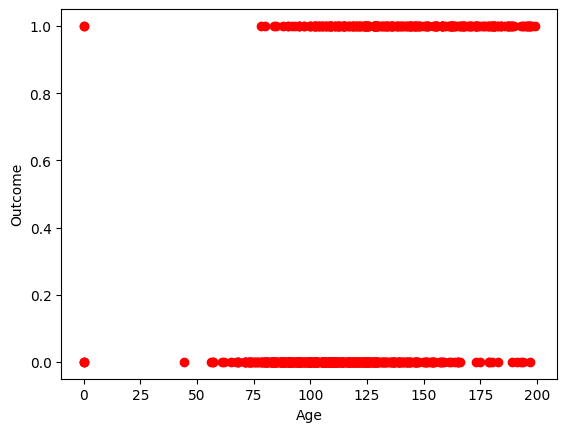

In [88]:
plt.scatter(X, y, color='r')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show()

In [89]:
model.score(x_test, y_test)

0.785234899328859

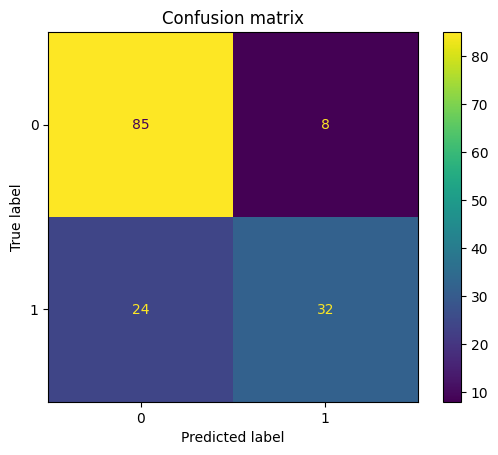

In [92]:
conf = metrics.confusion_matrix(y_test, y_pred)
conf_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf)
conf_display.plot()
plt.title("Confusion matrix")
plt.show()

In [93]:
metrics.accuracy_score(y_test, y_pred)

0.785234899328859

In [94]:
metrics.precision_score(y_test, y_pred)

0.8

In [95]:
metrics.recall_score(y_test, y_pred)

0.5714285714285714

In [96]:
metrics.f1_score(y_test, y_pred)

0.6666666666666666

In [97]:
metrics.matthews_corrcoef(y_test, y_pred)

0.5305158176657743

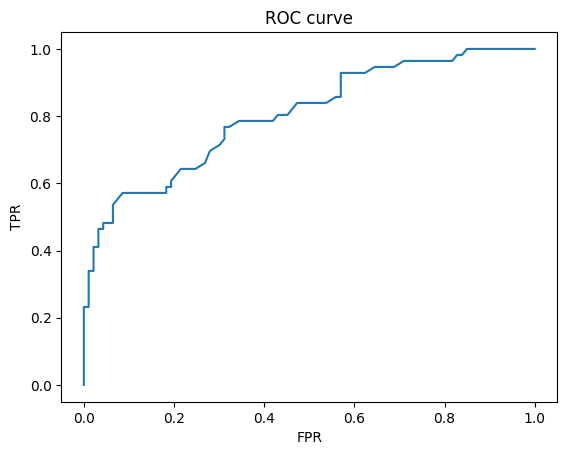

In [102]:
y_proba = model.predict_proba(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba[:,1])
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [103]:
metrics.roc_auc_score(y_test, y_proba[:, 1])

0.8043394777265745